# ONTARIO Population COVID-19 Data set from: 
[data.ontario.ca](https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario)

### Import Required LIbraries

In [18]:
import pandas as pd
import numpy as np

import datetime as dt

import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

%matplotlib inline

### Import the data set from a url

In [2]:
url = 'https://data.ontario.ca/dataset/f4112442-bdc8-45d2-be3c-12efae72fb27/resource/455fd63b-603d-4608-8216-7d8647f43350/download/conposcovidloc.csv'

df = pd.read_csv(url)

df.tail()

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
103907,103908,2020-11-18,2020-11-19,2020-11-19,2020-11-18,30s,FEMALE,No known epi link,Not Resolved,NaN,Durham Region Health Department,605 Rossland Road East,Whitby,L1N 0B2,www.durham.ca/en/health-and-wellness/health-an...,43.898605,-78.940341
103908,103909,2020-10-27,2020-10-28,2020-10-28,2020-10-27,30s,MALE,No known epi link,Resolved,NaN,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
103909,103910,2020-10-08,2020-10-09,2020-10-09,2020-10-08,<20,FEMALE,CC,Resolved,NaN,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
103910,103911,2020-11-08,2020-11-10,2020-11-10,2020-11-08,60s,FEMALE,CC,Not Resolved,NaN,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
103911,103912,2020-10-30,2020-11-07,2020-11-07,2020-11-07,40s,MALE,CC,Resolved,NaN,Chatham-Kent Health Unit,435 Grand Avenue West,Chatham,N7M 5L8,www.ckphu.com,42.403861,-82.208561


In [3]:
df['Test_Reported_Date'] = pd.to_datetime(df['Test_Reported_Date'])
print(min(df['Test_Reported_Date']))
print(max(df['Test_Reported_Date']))

2020-01-27 00:00:00
2020-11-21 00:00:00


## Filter the Test Reported Date to June 1, 2020 > Last Reported Date

In [4]:
start_date = '2020-06-01'
df = df[df['Test_Reported_Date'] >= start_date] 

In [5]:
df['Test_Reported_Date'] = pd.to_datetime(df['Test_Reported_Date'])
print(min(df['Test_Reported_Date']))

2020-06-01 00:00:00


In [6]:
df['Age_Group'].unique()

array(['30s', '<20', '50s', '20s', '40s', '80s', '90s', '60s', '70s', nan,
       'UNKNOWN'], dtype=object)

In [7]:
df_age20andbelow = df[df['Age_Group'] == '<20']

In [8]:
df2 = df_age20andbelow[["Test_Reported_Date", "Age_Group", "Reporting_PHU_City"]]

In [9]:
df2.head()

,Test_Reported_Date,Age_Group,Reporting_PHU_City
2,2020-11-14,<20,St. Thomas
8,2020-11-08,<20,St. Thomas
9,2020-10-28,<20,St. Thomas
13,2020-11-13,<20,Simcoe
20,2020-11-18,<20,St. Thomas


In [11]:
df2["Case"] = 1
df2 = df2.loc[:, ['Test_Reported_Date', 'Case']]
df2.head()

,Test_Reported_Date,Case
2,2020-11-14,1
8,2020-11-08,1
9,2020-10-28,1
13,2020-11-13,1
20,2020-11-18,1


In [12]:
df3 = df2.groupby(['Test_Reported_Date'])['Case'].agg('sum')
df3.tail(20)

Test_Reported_Date
2020-11-02    165
2020-11-03    147
2020-11-04    143
2020-11-05    192
2020-11-06    191
2020-11-07    150
2020-11-08    215
2020-11-09    222
2020-11-10    234
2020-11-11    220
2020-11-12    234
2020-11-13    211
2020-11-14    183
2020-11-15    200
2020-11-16    214
2020-11-17    153
2020-11-18    232
2020-11-19    172
2020-11-20    284
2020-11-21     81
Name: Case, dtype: int64

24

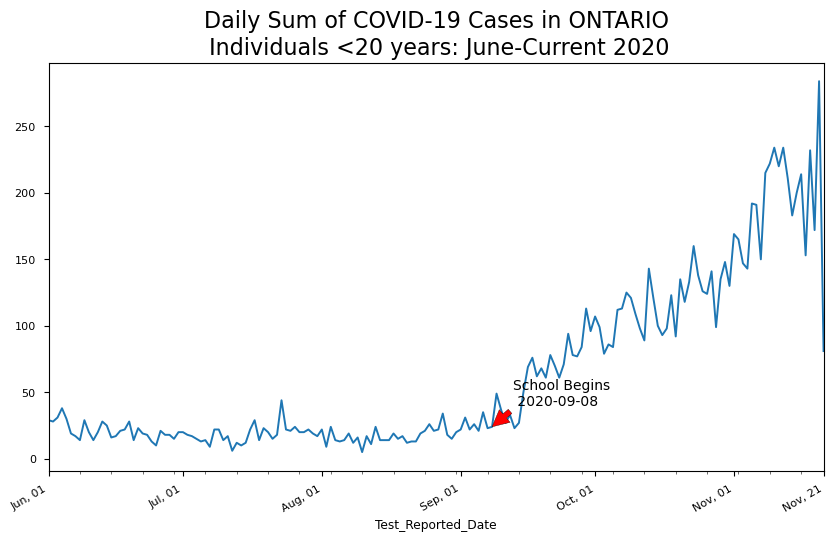

In [30]:
xpos = '2020-09-08'
ypos = df3.loc['2020-09-08']


plt.figure(figsize=(10,6))
plt.style.use(['default', 'seaborn-paper'])

df3.plot()
plt.title("Daily Sum of COVID-19 Cases in ONTARIO\n Individuals <20 years: June-Current 2020",
         fontsize=16)

plt.gcf().autofmt_xdate()

date_format = mpl_dates.DateFormatter('%b, %d')
# Get Current Axis
plt.gca().xaxis.set_major_formatter(date_format)

plt.annotate(f"School Begins \n {xpos}", xy = (xpos, ypos), xytext=(15, 15),
            textcoords='offset points',
            arrowprops = dict(facecolor='red'))

plt.show()

In [31]:
datetime_index = pd.DatetimeIndex(df2.Test_Reported_Date.values)
df4 = df2.set_index(datetime_index)
df4.drop('Test_Reported_Date', axis=1, inplace=True)
df4 = df4.sort_index()
df4.tail()

,Case
2020-11-21,1
2020-11-21,1
2020-11-21,1
2020-11-21,1
2020-11-21,1


In [32]:
weekly_sum = df4['Case'].resample("W").sum()
weekly_sum.tail()

2020-10-25     902
2020-11-01     946
2020-11-08    1203
2020-11-15    1504
2020-11-22    1136
Freq: W-SUN, Name: Case, dtype: int64

<AxesSubplot:>

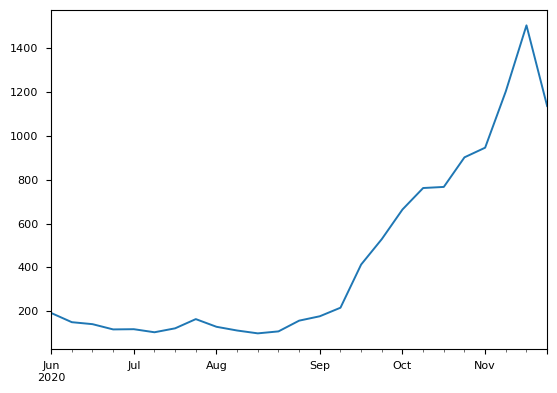

In [33]:
weekly_sum.plot()

In [34]:
df5 = df4.groupby(df4.index)['Case'].sum()

In [35]:
df5.head()

2020-06-01    29
2020-06-02    28
2020-06-03    31
2020-06-04    38
2020-06-05    30
Name: Case, dtype: int64

<AxesSubplot:>

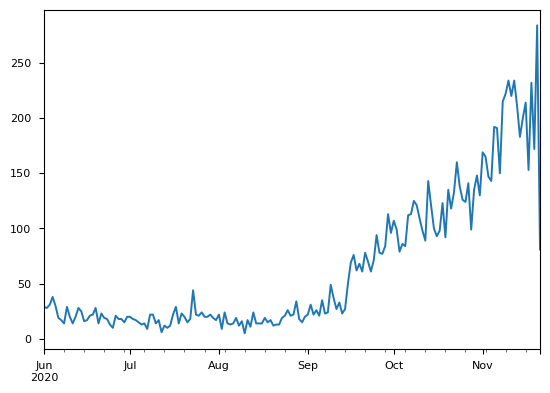

In [36]:
df5.plot()

In [52]:
df2.sort_values("Test_Reported_Date", inplace=True)
datetime_index = pd.DatetimeIndex(df2.Test_Reported_Date.values)
df2 = df2.set_index(datetime_index)
#df2.drop('Test_Reported_Date', inplace=True)
df2.head()

,Test_Reported_Date,Case
2020-06-01,2020-06-01,1
2020-06-01,2020-06-01,1
2020-06-01,2020-06-01,1
2020-06-01,2020-06-01,1
2020-06-01,2020-06-01,1


In [56]:
#df2 = df2.drop(['Test_Reported_Date'], axis=1)
df2.head()

,Case
2020-06-01,1
2020-06-01,1
2020-06-01,1
2020-06-01,1
2020-06-01,1


<AxesSubplot:>

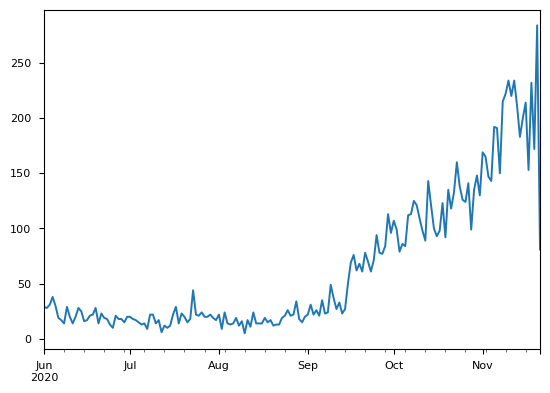

In [58]:
#df5 = pd.DataFrame(df5)
daily_sum= df2['Case'].resample("D").sum()
daily_sum.plot()

<AxesSubplot:>

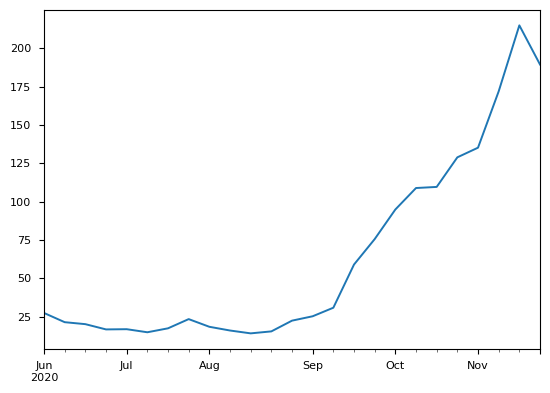

In [62]:
weekly_mean = daily_sum.resample("W").mean()
weekly_mean.plot()

In [60]:
daily_sum.tail()

2020-11-17    153
2020-11-18    232
2020-11-19    172
2020-11-20    284
2020-11-21     81
Freq: D, Name: Case, dtype: int64

In [63]:
weekly_mean.tail()

2020-10-25    128.857143
2020-11-01    135.142857
2020-11-08    171.857143
2020-11-15    214.857143
2020-11-22    189.333333
Freq: W-SUN, Name: Case, dtype: float64